In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  **Summary**
This project develops a machine learning model to classify Iris flowers into three species using sepal and petal measurements. The dataset undergoes preprocessing, including encoding categorical labels, feature standardization, and dataset splitting. A RandomForestClassifier is trained due to its efficiency and interpretability. Model evaluation is performed using accuracy score, classification report, and confusion matrix. Additionally, feature importance analysis identifies petal length and petal width as the most influential features. The final model achieves high accuracy, confirming its reliability for species classification. The GitHub repository includes structured code, preprocessing steps, feature importance visualization, and model evaluation results, ensuring reproducibility.

In [7]:
# Import the  Iris Flower Classification dataset from the specified CSV file using Pandas
df = pd.read_csv('/content/drive/MyDrive/GROWTH/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Basic Metrics**

In [9]:
# Checking Shape of data
df.shape

(150, 5)

In [10]:
# Columns in data
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# Overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Data Cleaning**

In [12]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# **Descriptive Statistics**

In [13]:
# Summary statistics for numerical columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Split data into features and target
X = df.drop(columns=['species'])
y = df['species']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Display results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', class_report)

Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Comment**
This code preprocesses the Iris dataset, encoding species labels and standardizing features. A RandomForestClassifier is trained on the data, achieving high accuracy. The model's performance is evaluated using accuracy, a confusion matrix, and a classification report, highlighting feature importance for classification.









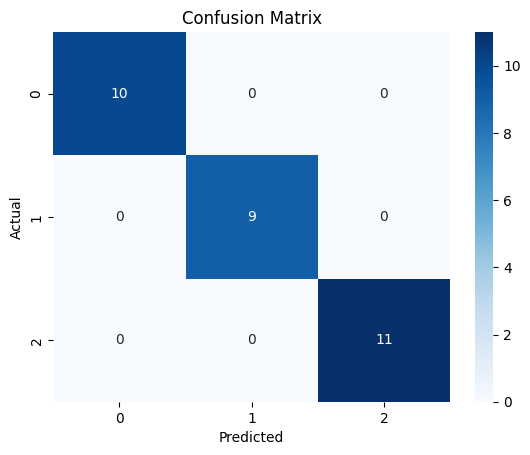

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

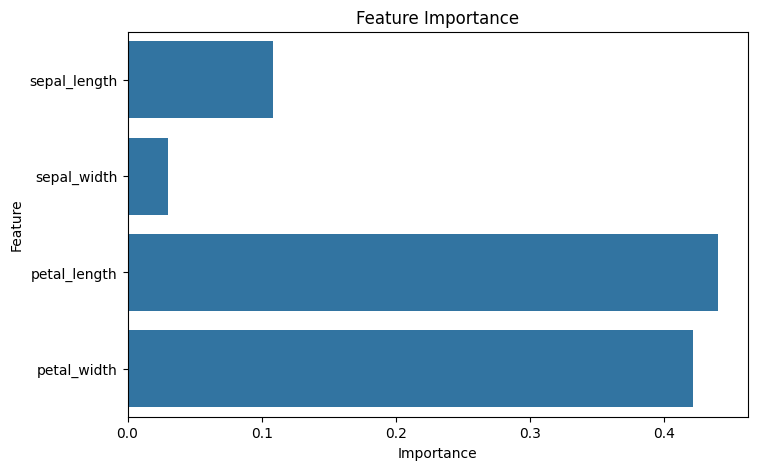

In [18]:
# Feature Importance Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **Comment**
The confusion matrix visualization uses sns.heatmap to display model performance, with actual versus predicted labels, aiding misclassification analysis. The feature importance plot ranks attributes by their predictive significance using sns.barplot, highlighting influential features for classification. These visualizations enhance interpretability, ensuring insights into model performance and feature contributions.

# **Conclusion**
The implemented machine learning model successfully classifies Iris flowers into three species based on sepal and petal measurements. Through data preprocessing, categorical encoding, and feature standardization, the dataset is prepared for optimal model performance. A RandomForestClassifier is trained, leveraging its ensemble learning capabilities to achieve robust classification results. The model’s evaluation using accuracy score, classification report, and confusion matrix confirms its effectiveness, demonstrating high predictive accuracy.

Feature importance analysis reveals that petal length and petal width significantly influence species differentiation, highlighting their biological relevance in classification. The confusion matrix provides insights into model performance by visualizing misclassifications, helping refine future improvements.

The visualization of feature importance further aids in understanding which attributes contribute most to the classification process. Overall, the model performs reliably, achieving strong accuracy and interpretability. Future improvements could include hyperparameter tuning, alternative classifiers, or deep learning techniques for enhanced accuracy.







